In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical
from tensorflow import keras

from IPython.display import display
import random
import matplotlib.pyplot as plt
# random.seed(10)

In [123]:
# Import Data
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games = pd.read_csv(games_folder_path + 'games_sorted.csv', index_col=False, parse_dates=['date'])

C:\Users\Craig\AppData\Local\Temp\ipykernel_13920\1834776661.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_13920\1834776661.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_13920\1834776661.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2014 = pd.read_csv(games_

In [124]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']

with open("features.txt") as f:
    features = f.read().split('\n')
features.append('venue')
features.append('homeTeam')
features.append('awayTeam')

def set_columns(game_list):
    game_list = game_list[features]
    game_list.columns = game_list.columns.astype(str)
    return game_list

games_2012 = set_columns(games_2012)
games_2013 = set_columns(games_2013)
games_2014 = set_columns(games_2014)
games_2015 = set_columns(games_2015)
games_2016 = set_columns(games_2016)
games_2017 = set_columns(games_2017)
games_2018 = set_columns(games_2018)
games_2019 = set_columns(games_2019)
games_2020 = set_columns(games_2020)
games_2021 = set_columns(games_2021)

In [125]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)


def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)

    all_teams = np.vstack([home_teams, away_teams]).T
 
    oneHot = OneHotEncoder()
    X_teams = oneHot.fit_transform(all_teams).todense()
    X_teams = pd.DataFrame(X_teams)
    games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

all_games = OHE_Teams(all_games)

In [126]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    venues = venues.reshape(-1,1)
    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

all_games = OHE_Venues(all_games)

In [127]:
def drop_columns(game_list):
    game_list = game_list.drop(['venue', 'homeTeam', 'awayTeam'],axis=1)
    game_list.columns = game_list.columns.astype(str)
    return game_list

games_2012 = drop_columns(games_2012)
games_2013 = drop_columns(games_2013)
games_2014 = drop_columns(games_2014)
games_2015 = drop_columns(games_2015)
games_2016 = drop_columns(games_2016)
games_2017 = drop_columns(games_2017)
games_2018 = drop_columns(games_2018)
games_2019 = drop_columns(games_2019)
games_2020 = drop_columns(games_2020)
games_2021 = drop_columns(games_2021)

all_games = drop_columns(all_games)

In [128]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
games_2012 = scaler.fit_transform(games_2012)
games_2013 = scaler.fit_transform(games_2013)
games_2014 = scaler.fit_transform(games_2014)
games_2015 = scaler.fit_transform(games_2015)
games_2016 = scaler.fit_transform(games_2016)
games_2017 = scaler.fit_transform(games_2017)
games_2018 = scaler.fit_transform(games_2018)
games_2019 = scaler.fit_transform(games_2019)
games_2020 = scaler.fit_transform(games_2020)
games_2021 = scaler.fit_transform(games_2021)

In [129]:
y_train_2012 = y_true_2012[9:171]
y_valid_2012 = y_true_2012[171:]

y_train_2013 = y_true_2013[9:171]
y_valid_2013 = y_true_2013[171:]

y_train_2014 = y_true_2014[9:171]
y_valid_2014 = y_true_2014[171:]

y_train_2015 = y_true_2015[9:170]
y_valid_2015 = y_true_2015[170:]

y_train_2016 = y_true_2016[9:171]
y_valid_2016 = y_true_2016[171:]

y_train_2017 = y_true_2017[9:171]
y_valid_2017 = y_true_2017[171:]

y_train_2018 = y_true_2018[9:171]
y_valid_2018 = y_true_2018[171:]

y_train_2019 = y_true_2019[9:171]
y_valid_2019 = y_true_2019[171:]

y_train_2020 = y_true_2020[9:127]
y_valid_2020 = y_true_2020[127:]

y_train_2021 = y_true_2021[9:171]
y_valid_2021 = y_true_2021[171:]

# y_train = y_true[:1447]
# y_valid = y_true[1447:1655]

In [130]:
# OHE Y values
oneHot = OneHotEncoder()
def OHE_y_values(y_val):
    y = np.vstack([y_val]).T
    
    # for i in range(len(y)):
    #     if y[i] == 1:
    #         y[i] = 0

    y_OHE = oneHot.fit_transform(y).toarray()

    return y_OHE


y_train_2012_OHE = OHE_y_values(y_train_2012)
y_valid_2012_OHE = OHE_y_values(y_valid_2012)

y_train_2013_OHE = OHE_y_values(y_train_2013)
y_valid_2013_OHE = OHE_y_values(y_valid_2013)

y_train_2014_OHE = OHE_y_values(y_train_2014)
y_valid_2014_OHE = OHE_y_values(y_valid_2014)

y_train_2015_OHE = OHE_y_values(y_train_2015)
y_valid_2015_OHE = OHE_y_values(y_valid_2015)

y_train_2016_OHE = OHE_y_values(y_train_2016)
y_valid_2016_OHE = OHE_y_values(y_valid_2016)

y_train_2017_OHE = OHE_y_values(y_train_2017)
y_valid_2017_OHE = OHE_y_values(y_valid_2017)

y_train_2018_OHE = OHE_y_values(y_train_2018)
y_valid_2018_OHE = OHE_y_values(y_valid_2018)

y_train_2019_OHE = OHE_y_values(y_train_2019)
y_valid_2019_OHE = OHE_y_values(y_valid_2019)

y_train_2020_OHE = OHE_y_values(y_train_2020)
y_valid_2020_OHE = OHE_y_values(y_valid_2020)

y_train_2021_OHE = OHE_y_values(y_train_2021)
y_valid_2021_OHE = OHE_y_values(y_valid_2021)

# y_train_OHE = OHE_y_values(y_train)
# y_valid_OHE = OHE_y_values(y_valid)

In [131]:
def set_window(games):
    y = 0
    p = 0
    d_full = np.zeros(shape=(1980,75))
    for x in range(0,d_full.shape[0],10): # Goes through index for each round
        y = 9 # link to previous round
        if x % 90 == 0:
            p += 1 # move to next round when 90 index is reached
        for i in range(9): # fills out the first nine posistions in the window with previous games
                d_full[x+i] = games[p+i] # at pos x add corresponding previous game
        d_full[x+y] = games[x//10 + y] # add game in question to final position
        
    d_Train = d_full[:1620]
    d_valid = d_full[1620:]
    d_Train = np.reshape(d_Train, (162, 10,75))
    d_valid = np.reshape(d_valid, (36, 10, 75))
    return d_Train, d_valid

x_train_2012, x_valid_2012 = set_window(games_2012)
x_train_2013, x_valid_2013 = set_window(games_2013)
x_train_2014, x_valid_2014 = set_window(games_2014)
# x_train_2015, x_valid_2015 = set_window(games_2015)
x_train_2016, x_valid_2016 = set_window(games_2016)
x_train_2017, x_valid_2017 = set_window(games_2017)
x_train_2018, x_valid_2018 = set_window(games_2018)
x_train_2019, x_valid_2019 = set_window(games_2019)
# x_train_2020, x_valid_2020 = set_window(games_2020)

x_train_2021, x_valid_2021 = set_window(games_2021)

In [23]:
def set_window_2015(games):
    y = 0
    p = 0
    d_full = np.zeros(shape=(1970,75))
    for x in range(0,d_full.shape[0],10): # Goes through index for each round
        y = 9 # link to previous round
        if x % 90 == 0:
            p += 1 # move to next round when 90 index is reached
        for i in range(9): # fills out the first nine posistions in the window with previous games
                d_full[x+i] = games[p+i] # at pos x add corresponding previous game
            
        d_full[x+y] = games[x//10 + y] # add game in question to final position
        
    d_Train = d_full[:1610]
    d_valid = d_full[1610:]
    d_Train = np.reshape(d_Train, (161, 10,75))
    d_valid = np.reshape(d_valid, (36, 10, 75))
    return d_Train, d_valid

x_train_2015, x_valid_2015 = set_window_2015(games_2015)


In [101]:
def train_model_1( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)

    # train_history = model.fit( x_train_2012 , y_train_2012 , epochs = 10, validation_split = 0.1 , verbose = 1 )
    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_1")
    # print( f"Train Accuracy: {train_history.history}" )
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


In [105]:
results_2012, pred_2012, history_2012 = train_model_1(x_train_2012, y_train_2012_OHE, x_valid_2012, y_valid_2012_OHE) 
results_2013, pred_2013, history_2013 = train_model_1(x_train_2013, y_train_2013_OHE, x_valid_2013, y_valid_2013_OHE) 
results_2014, pred_2014, history_2014 = train_model_1(x_train_2014, y_train_2014_OHE, x_valid_2014, y_valid_2014_OHE) 
results_2015, pred_2015, history_2015 = train_model_1(x_train_2015, y_train_2015_OHE, x_valid_2015, y_valid_2015_OHE) 
results_2016, pred_2016, history_2016 = train_model_1(x_train_2016, y_train_2016_OHE, x_valid_2016, y_valid_2016_OHE) 
results_2017, pred_2017, history_2017 = train_model_1(x_train_2017, y_train_2017_OHE, x_valid_2017, y_valid_2017_OHE) 
results_2018, pred_2018, history_2018 = train_model_1(x_train_2018, y_train_2018_OHE, x_valid_2018, y_valid_2018_OHE) 
results_2019, pred_2019, history_2019 = train_model_1(x_train_2019, y_train_2019_OHE, x_valid_2019, y_valid_2019_OHE)

Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_170 (LSTM)             (None, 32)                13824     
                                                                 
 dense_170 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4376 - accuracy: 0.5655 - mse: 0.4376 - val_loss: 0.2817 - val_accuracy: 0.7059 - val_mse: 0.2817 - lr: 0.0010 - 4s/epoch - 781ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2676 - accuracy: 0.6207 - mse: 0.2676 - val_loss: 0.2519 - val_accuracy: 0.4118 - val_mse: 0.2519 - lr: 0.0010 - 77ms/epoch - 15ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2443 - accuracy: 0.6000 - mse: 0.2443 - val_loss: 0.2822 - val_accuracy: 0.4118 - v

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.20406880974769592
Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_171 (LSTM)             (None, 32)                13824     
                                                                 
 dense_171 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4592 - accuracy: 0.5241 - mse: 0.4592 - val_loss: 0.3164 - val_accuracy: 0.5294 - val_mse: 0.3164 - lr: 0.0010 - 4s/epoch - 740ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2951 - accuracy: 0.5517 - mse: 0.2951 - val_loss: 0.2618 - val_accuracy: 0.5294 - val_mse: 0.2618 - lr: 0.0010 - 80ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2646 - accuracy: 0.5724 - mse: 0.2646 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6667
Loss: 0.20726865530014038
Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_172 (LSTM)             (None, 32)                13824     
                                                                 
 dense_172 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4525 - accuracy: 0.5586 - mse: 0.4525 - val_loss: 0.2914 - val_accuracy: 0.5882 - val_mse: 0.2914 - lr: 0.0010 - 4s/epoch - 764ms/step
Epoch 2/50
5/5 - 0s - loss: 0.3024 - accuracy: 0.5517 - mse: 0.3024 - val_loss: 0.2396 - val_accuracy: 0.6471 - val_mse: 0.2396 - lr: 0.0010 - 84ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2628 - accuracy: 0.5586 - mse: 0.2628 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6667
Loss: 0.22338898479938507
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_173 (LSTM)             (None, 32)                13824     
                                                                 
 dense_173 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4497 - accuracy: 0.4861 - mse: 0.4497 - val_loss: 0.2689 - val_accuracy: 0.5882 - val_mse: 0.2689 - lr: 0.0010 - 4s/epoch - 798ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2959 - accuracy: 0.5347 - mse: 0.2959 - val_loss: 0.2487 - val_accuracy: 0.5294 - val_mse: 0.2487 - lr: 0.0010 - 80ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2695 - accuracy: 0.5069 - mse: 0.2695 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6111
Loss: 0.20801305770874023
Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_174 (LSTM)             (None, 32)                13824     
                                                                 
 dense_174 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4298 - accuracy: 0.6000 - mse: 0.4298 - val_loss: 0.2481 - val_accuracy: 0.7059 - val_mse: 0.2481 - lr: 0.0010 - 4s/epoch - 766ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2608 - accuracy: 0.6207 - mse: 0.2608 - val_loss: 0.2104 - val_accuracy: 0.7059 - val_mse: 0.2104 - lr: 0.0010 - 81ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2495 - accuracy: 0.6000 - mse: 0.2495 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.6944
Loss: 0.21947422623634338
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_175 (LSTM)             (None, 32)                13824     
                                                                 
 dense_175 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4678 - accuracy: 0.5379 - mse: 0.4678 - val_loss: 0.2689 - val_accuracy: 0.6471 - val_mse: 0.2689 - lr: 0.0010 - 4s/epoch - 799ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2882 - accuracy: 0.6069 - mse: 0.2882 - val_loss: 0.2352 - val_accuracy: 0.6471 - val_mse: 0.2352 - lr: 0.0010 - 82ms/epoch - 16ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2612 - accuracy: 0.5379 - mse: 0.2612 - 

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.7222
Loss: 0.1927671730518341
Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_176 (LSTM)             (None, 32)                13824     
                                                                 
 dense_176 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4345 - accuracy: 0.5448 - mse: 0.4345 - val_loss: 0.2975 - val_accuracy: 0.5882 - val_mse: 0.2975 - lr: 0.0010 - 4s/epoch - 766ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2875 - accuracy: 0.4690 - mse: 0.2875 - val_loss: 0.2466 - val_accuracy: 0.6471 - val_mse: 0.2466 - lr: 0.0010 - 86ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2699 - accuracy: 0.4828 - mse: 0.2699 - v

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.75
Loss: 0.19704467058181763
Model: "sequential_177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_177 (LSTM)             (None, 32)                13824     
                                                                 
 dense_177 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4180 - accuracy: 0.5655 - mse: 0.4180 - val_loss: 0.3008 - val_accuracy: 0.5882 - val_mse: 0.3008 - lr: 0.0010 - 4s/epoch - 784ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2633 - accuracy: 0.6000 - mse: 0.2633 - val_loss: 0.2528 - val_accuracy: 0.4118 - val_mse: 0.2528 - lr: 0.0010 - 86ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2647 - accuracy: 0.5241 - mse: 0.2647 - va

INFO:tensorflow:Assets written to: LSTM_1\assets


INFO:tensorflow:Assets written to: LSTM_1\assets


Accuracy: 0.7222
Loss: 0.2260429561138153


In [106]:
results = pd.DataFrame(data = [results_2012[:2],results_2013[:2],results_2014[:2],results_2015[:2],results_2016[:2],
                               results_2017[:2],results_2018[:2],results_2019[:2]],
                            index = ['2012', '2013', '2014','2015','2016','2017','2018','2019'],
                            columns = ['loss', 'accuracy'])
sum(results['accuracy'])/8


0.6909722164273262

(Text(0.5, 1.0, '2018'), Text(0.5, 1.0, '2019'))

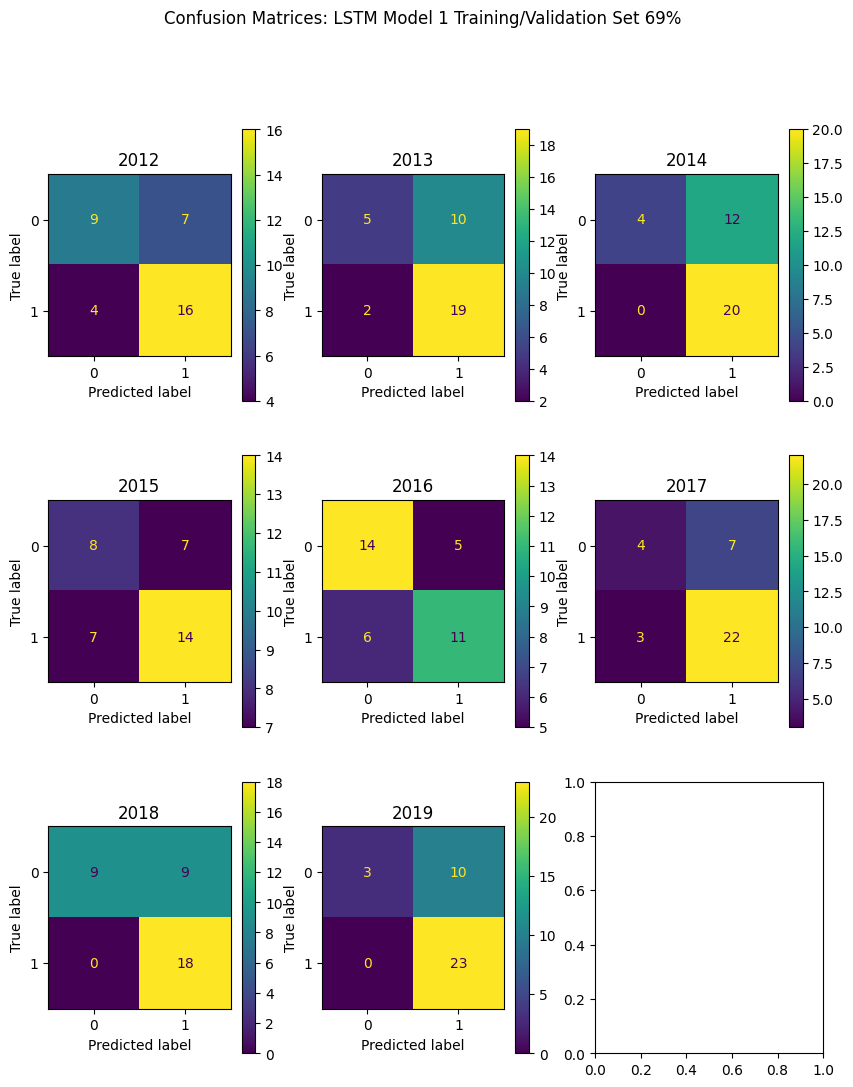

In [108]:
def build_conf_matrix(prediction, true):
    s = 0
    pl = []
    for pred in prediction:
        if pred[0] > pred[1]:
            pl.append(0)
        else:
            pl.append(1)

    for i in range(len(pl)):
        if pl[i] == true.values[i]:
            s+=1

    c_train = confusion_matrix(true, pl)
    disp = ConfusionMatrixDisplay(c_train)
    return disp

cf_2012 = build_conf_matrix(pred_2012, y_valid_2012)
cf_2013 = build_conf_matrix(pred_2013, y_valid_2013)
cf_2014 = build_conf_matrix(pred_2014, y_valid_2014)
cf_2015 = build_conf_matrix(pred_2015, y_valid_2015)
cf_2016 = build_conf_matrix(pred_2016, y_valid_2016)
cf_2017 = build_conf_matrix(pred_2017, y_valid_2017)
cf_2018 = build_conf_matrix(pred_2018, y_valid_2018)
cf_2019 = build_conf_matrix(pred_2019, y_valid_2019)


fig, ax = plt.subplots(3,3)
fig.set_figwidth(10)
fig.set_figheight(12)
fig.suptitle("Confusion Matrices: LSTM Model 1 Training/Validation Set 69%")
cf_2012.plot(ax=ax[0][0]), cf_2013.plot(ax=ax[0][1]), cf_2014.plot(ax=ax[0][2])
cf_2015.plot(ax=ax[1][0]), cf_2016.plot(ax=ax[1][1]), cf_2017.plot(ax=ax[1][2])
cf_2018.plot(ax=ax[2][0]), cf_2019.plot(ax=ax[2][1])

ax[0][0].set_title(2012), ax[0][1].set_title(2013), ax[0][2].set_title(2014)
ax[1][0].set_title(2015), ax[1][1].set_title(2016), ax[1][2].set_title(2017)
ax[2][0].set_title(2018), ax[2][1].set_title(2019)

Res_1 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.25, recurrent_dropout = 0.25, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(2, activation="tanh"))

Res_2 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'sigmoid' , dropout = 0.25, recurrent_dropout = 0.25, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(2, activation="tanh"))

Res_3 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.25, recurrent_dropout = 0.25, return_sequences=True))
    model.add(LSTM( 64, activation='tanh ))
    model.add(Dense(2, activation="tanh"))

Res_4 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(2, activation="tanh"))

Res_5 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(2, activation="tanh"))


Res_6 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.4, recurrent_dropout = 0.4, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(2, activation="tanh"))

Res_7 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM( 64, return_sequences=True))
    model.add(LSTM( 64 ))
    model.add(Dense(64, activation="tanh))
    model.add(Dense(2, activation="tanh"))

Res_8 =   model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM( 64, return_sequences=True, dropout = 0.3))
    model.add(LSTM( 64 ))
    model.add(Dense(32, activation="tanh))
    model.add(Dense(2, activation="tanh"))

Res_10 = model.add(LSTM( 128 ,input_shape = (88,1), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model.add(LSTM( 64, return_sequences=True, dropout=0.3))
    model.add(LSTM( 32, return_sequences=True, dropout= .1 ))
    model.add(LSTM( 16, return_sequences=True ))
    model.add(Dense(8))
    model.add(LSTM( 32 ))
    # model.add(LSTM( 64 ))
    model.add(Dense(32, activation="tanh"))    
    model.add(Dense(16, activation="tanh"))
    model.add(Dense(2, activation="tanh"))

In [109]:
average_loss = [0 for i in range(50)]
average_val_loss = [0 for i in range(50)]
average_accuracy = [0 for i in range(50)]
average_val_accuracy = [0 for i in range(50)]

h_list = [history_2012, history_2013, history_2014, history_2015, history_2016, history_2017, history_2018, history_2019]
for year in h_list:
    for i in range(50):
        average_loss[i] += (year.history['loss'][i])
        average_val_loss[i] += (year.history['val_loss'][i])
        average_accuracy[i] += (year.history['accuracy'][i])
        average_val_accuracy[i] += (year.history['val_accuracy'][i])

for i in range(50):
    average_loss[i] = average_loss[i]/8

for i in range(50):
    average_val_loss[i] = average_val_loss[i]/8

for i in range(50):
    average_accuracy[i] = average_accuracy[i]/8

for i in range(50):
    average_val_accuracy[i] = average_val_accuracy[i]/8



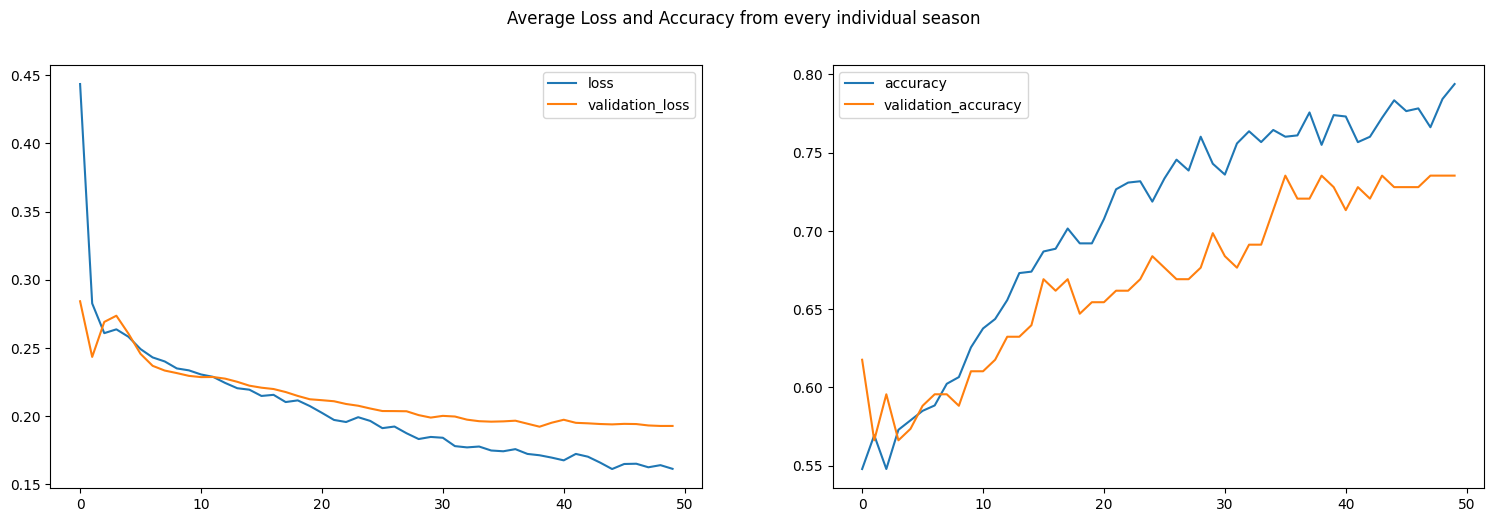

In [374]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle('Average Loss and Accuracy from every individual season')
plt.subplot(1,2,1)
plt.plot(average_loss)
plt.plot(average_val_loss)
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(average_accuracy)
plt.plot(average_val_accuracy)
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [149]:
x_train_all = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019), axis=0)
y_train_all = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE))

x_test = np.concatenate((x_train_2021, x_valid_2021))
y_test = np.concatenate((y_train_2021_OHE, y_valid_2021_OHE))

In [299]:
def train_model_final( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)
    
    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    model.save("LSTM_Final")

    # model_transfer = keras.models.load_model('C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats/LSTM_1_69')
    # model_transfer.fit(xValid, yValid)

    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


In [152]:
results_final, pred_final, history_final = train_model_final(x_train_all, y_train_all, x_test, y_test)

Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_186 (LSTM)             (None, 32)                13824     
                                                                 
 dense_186 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
45/45 - 4s - loss: 0.2825 - accuracy: 0.5309 - mse: 0.2825 - val_loss: 0.2356 - val_accuracy: 0.6101 - val_mse: 0.2356 - lr: 0.0010 - 4s/epoch - 97ms/step
Epoch 2/50
45/45 - 0s - loss: 0.2430 - accuracy: 0.5857 - mse: 0.2430 - val_loss: 0.2300 - val_accuracy: 0.6038 - val_mse: 0.2300 - lr: 0.0010 - 408ms/epoch - 9ms/step
Epoch 3/50
45/45 - 0s - loss: 0.2309 - accuracy: 0.6334 - mse: 0.2309 - val_loss: 0.2235 - val_accuracy: 0.641

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5606
Loss: 0.24505019187927246


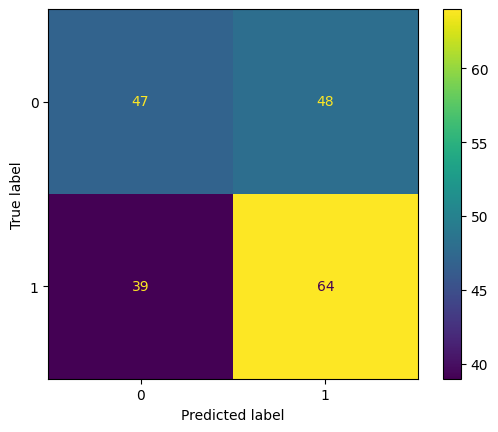

In [158]:
cf_final = build_conf_matrix(pred_final, y_true_2021[9:])
cf_final.plot()
plt.show()

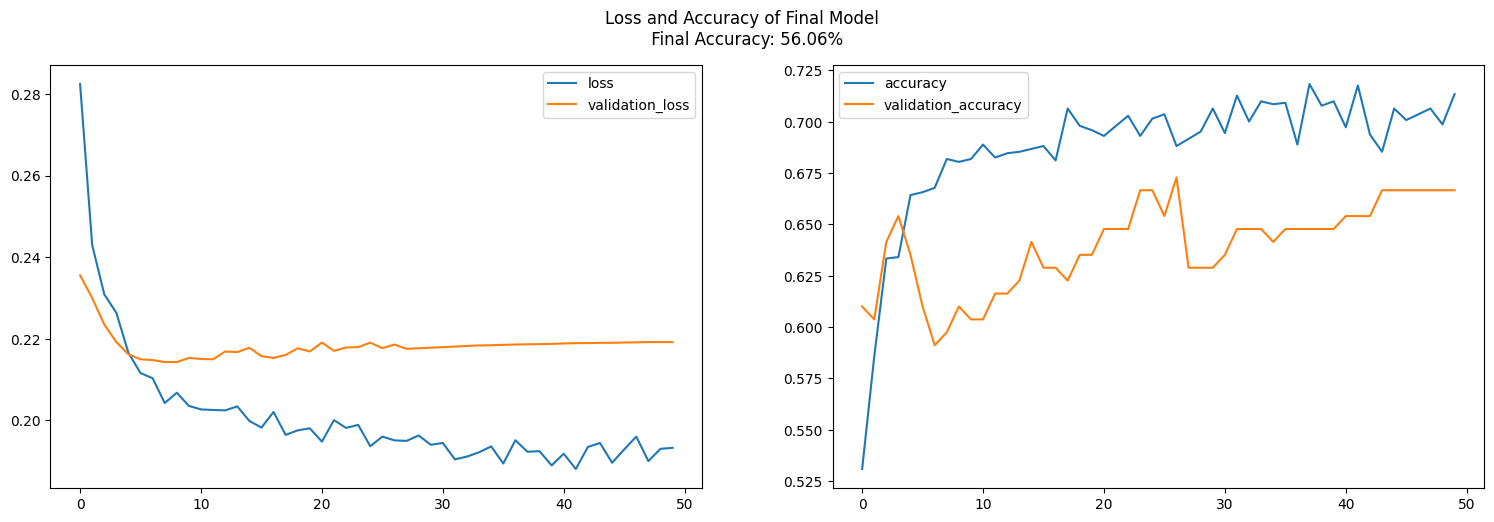

In [375]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy of Final Model \n Final Accuracy: {"{:.2f}".format(results_final[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

In [238]:
x_train_all_r4 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:27]), axis=0)
y_train_all_r4 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:27]))

x_test_r4 = np.concatenate((x_train_2021[27:], x_valid_2021))
y_test_r4 = np.concatenate((y_train_2021_OHE[27:], y_valid_2021_OHE))

results_final_r4, pred_final_r4, history_final_r4 = train_model_final(x_train_all_r4, y_train_all_r4, x_test_r4, y_test_r4)

cf_final_r4 = build_conf_matrix(pred_final_r4, y_true_2021[36:])
cf_final_r4.plot()
plt.title(f'Round 4 Accuracy: {"{:.2f}".format(results_final_r4[1])}')
plt.show()

Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_200 (LSTM)             (None, 32)                13824     
                                                                 
 dense_200 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
46/46 - 4s - loss: 0.2836 - accuracy: 0.5480 - mse: 0.2836 - val_loss: 0.2361 - val_accuracy: 0.6211 - val_mse: 0.2361 - lr: 0.0010 - 4s/epoch - 88ms/step
Epoch 2/50
46/46 - 0s - loss: 0.2428 - accuracy: 0.5832 - mse: 0.2428 - val_loss: 0.2314 - val_accuracy: 0.6211 - val_mse: 0.2314 - lr: 0.0010 - 386ms/epoch - 8ms/step
Epoch 3/50
46/46 - 0s - loss: 0.2333 - accuracy: 0.6142 - mse: 0.2333 - val_loss: 0.2262 - val_accuracy: 0.658

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5731
Loss: 0.24792587757110596


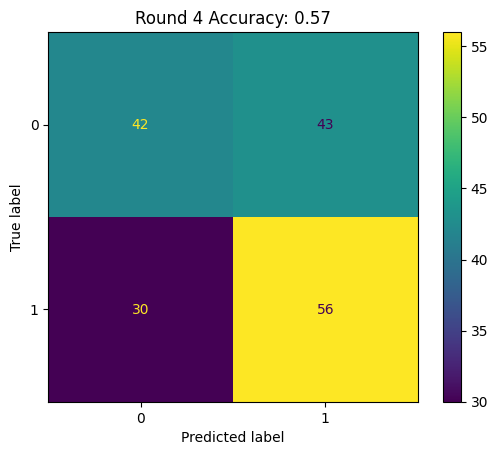

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_210 (LSTM)             (None, 32)                13824     
                                                                 
 dense_210 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 - 5s - loss: 0.2818 - accuracy: 0.5513 - mse: 0.2818 - val_loss: 0.2408 - val_accuracy: 0.5732 - val_mse: 0.2408 - lr: 0.0010 - 5s/epoch - 97ms/step
Epoch 2/50
47/47 - 0s - loss: 0.2433 - accuracy: 0.5743 - mse: 0.2433 - val_loss: 0.2367 - val_accuracy: 0.6037 - val_mse: 0.2367 - lr: 0.0010 - 426ms/epoch - 9ms/step
Epoch 3/50
47/47 - 0s - loss: 0.2323 - accuracy: 0.6300 - mse: 0.2323 - val_loss: 0.2340 - val_accuracy: 0.634

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5694
Loss: 0.24216842651367188


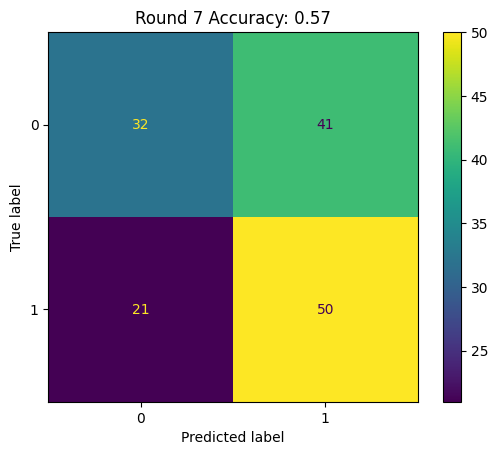

In [255]:
x_train_all_r7 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:54]), axis=0)
y_train_all_r7 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:54]))

x_test_r7 = np.concatenate((x_train_2021[54:], x_valid_2021))
y_test_r7 = np.concatenate((y_train_2021_OHE[54:], y_valid_2021_OHE))

results_final_r7, pred_final_r7, history_final_r7 = train_model_final(x_train_all_r7, y_train_all_r7, x_test_r7, y_test_r7)

cf_final_r7 = build_conf_matrix(pred_final_r7, y_true_2021[63:])
cf_final_r7.plot()
plt.title(f'Round 7 Accuracy: {"{:.2f}".format(results_final_r7[1])}')
plt.show()

Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_211 (LSTM)             (None, 32)                13824     
                                                                 
 dense_211 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
47/47 - 4s - loss: 0.2819 - accuracy: 0.5444 - mse: 0.2819 - val_loss: 0.2406 - val_accuracy: 0.5928 - val_mse: 0.2406 - lr: 0.0010 - 4s/epoch - 91ms/step
Epoch 2/50
47/47 - 0s - loss: 0.2413 - accuracy: 0.5772 - mse: 0.2413 - val_loss: 0.2360 - val_accuracy: 0.5928 - val_mse: 0.2360 - lr: 0.0010 - 414ms/epoch - 9ms/step
Epoch 3/50
47/47 - 0s - loss: 0.2302 - accuracy: 0.6192 - mse: 0.2302 - val_loss: 0.2322 - val_accuracy: 0.616

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5812
Loss: 0.25394895672798157


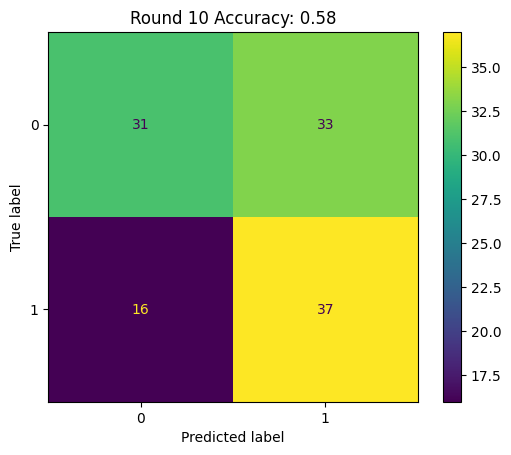

In [256]:
x_train_all_r10 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:81]), axis=0)
y_train_all_r10 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:81]))

x_test_r10 = np.concatenate((x_train_2021[81:], x_valid_2021))
y_test_r10 = np.concatenate((y_train_2021_OHE[81:], y_valid_2021_OHE))

results_final_r10, pred_final_r10, history_final_r10 = train_model_final(x_train_all_r10, y_train_all_r10, x_test_r10, y_test_r10)

cf_final_r10 = build_conf_matrix(pred_final_r10, y_true_2021[90:])
cf_final_r10.plot()
plt.title(f'Round 10 Accuracy: {"{:.2f}".format(results_final_r10[1])}')
plt.show()

Model: "sequential_223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_223 (LSTM)             (None, 32)                13824     
                                                                 
 dense_223 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
48/48 - 5s - loss: 0.2789 - accuracy: 0.5562 - mse: 0.2789 - val_loss: 0.2410 - val_accuracy: 0.5588 - val_mse: 0.2410 - lr: 0.0010 - 5s/epoch - 103ms/step
Epoch 2/50
48/48 - 0s - loss: 0.2410 - accuracy: 0.5865 - mse: 0.2410 - val_loss: 0.2352 - val_accuracy: 0.6000 - val_mse: 0.2352 - lr: 0.0010 - 448ms/epoch - 9ms/step
Epoch 3/50
48/48 - 0s - loss: 0.2323 - accuracy: 0.6160 - mse: 0.2323 - val_loss: 0.2306 - val_accuracy: 0.61

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5556
Loss: 0.2549756169319153


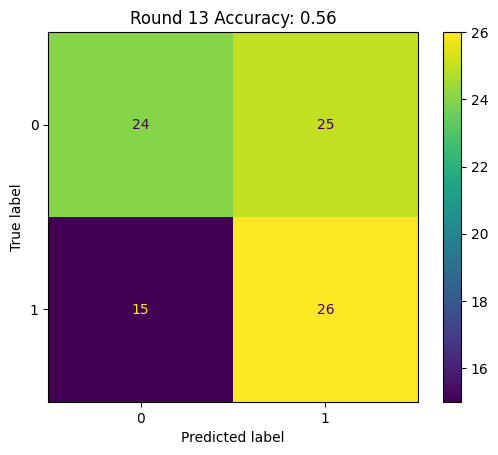

In [268]:
x_train_all_r13 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:108]), axis=0)
y_train_all_r13 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:108]))

x_test_r13 = np.concatenate((x_train_2021[108:], x_valid_2021))
y_test_r13 = np.concatenate((y_train_2021_OHE[108:], y_valid_2021_OHE))

results_final_r13, pred_final_r13, history_final_r13 = train_model_final(x_train_all_r13, y_train_all_r13, x_test_r13, y_test_r13)

cf_final_r13 = build_conf_matrix(pred_final_r13, y_true_2021[117:])
cf_final_r13.plot()
plt.title(f'Round 13 Accuracy: {"{:.2f}".format(results_final_r13[1])}')
plt.show()

Model: "sequential_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_215 (LSTM)             (None, 32)                13824     
                                                                 
 dense_215 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
49/49 - 4s - loss: 0.2801 - accuracy: 0.5498 - mse: 0.2801 - val_loss: 0.2460 - val_accuracy: 0.5349 - val_mse: 0.2460 - lr: 0.0010 - 4s/epoch - 89ms/step
Epoch 2/50
49/49 - 0s - loss: 0.2393 - accuracy: 0.5938 - mse: 0.2393 - val_loss: 0.2399 - val_accuracy: 0.5349 - val_mse: 0.2399 - lr: 0.0010 - 447ms/epoch - 9ms/step
Epoch 3/50
49/49 - 0s - loss: 0.2314 - accuracy: 0.6274 - mse: 0.2314 - val_loss: 0.2355 - val_accuracy: 0.575

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5873
Loss: 0.2342759221792221


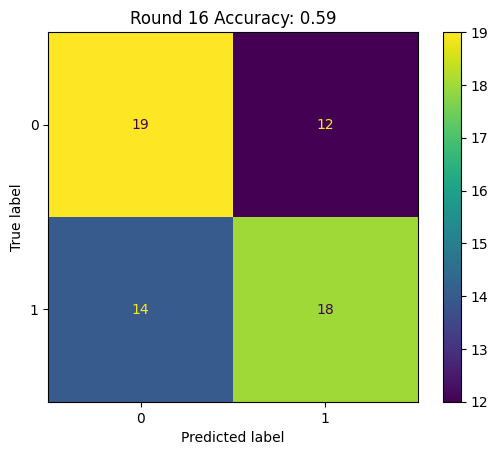

In [260]:
x_train_all_r16 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:135]), axis=0)
y_train_all_r16 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:135]))

x_test_r16 = np.concatenate((x_train_2021[135:], x_valid_2021))
y_test_r16 = np.concatenate((y_train_2021_OHE[135:], y_valid_2021_OHE))

results_final_r16, pred_final_r16, history_final_r16 = train_model_final(x_train_all_r16, y_train_all_r16, x_test_r16, y_test_r16)

cf_final_r16 = build_conf_matrix(pred_final_r16, y_true_2021[144:])
cf_final_r16.plot()
plt.title(f'Round 16 Accuracy: {"{:.2f}".format(results_final_r16[1])}')
plt.show()

Model: "sequential_232"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_232 (LSTM)             (None, 32)                13824     
                                                                 
 dense_232 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
50/50 - 4s - loss: 0.2787 - accuracy: 0.5408 - mse: 0.2787 - val_loss: 0.2500 - val_accuracy: 0.5143 - val_mse: 0.2500 - lr: 0.0010 - 4s/epoch - 84ms/step
Epoch 2/50
50/50 - 0s - loss: 0.2407 - accuracy: 0.5911 - mse: 0.2407 - val_loss: 0.2429 - val_accuracy: 0.5543 - val_mse: 0.2429 - lr: 0.0010 - 410ms/epoch - 8ms/step
Epoch 3/50
50/50 - 0s - loss: 0.2303 - accuracy: 0.6191 - mse: 0.2303 - val_loss: 0.2379 - val_accuracy: 0.554

INFO:tensorflow:Assets written to: LSTM_Final\assets


INFO:tensorflow:Assets written to: LSTM_Final\assets


Accuracy: 0.5556
Loss: 0.25679630041122437


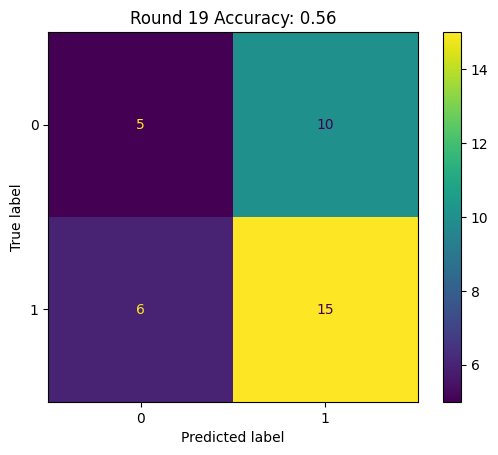

In [284]:
x_train_all_r19 = np.concatenate((x_train_2012, x_valid_2012, x_train_2013, x_valid_2013, x_train_2014, x_valid_2014,
                            x_train_2015, x_valid_2012, x_train_2016, x_valid_2016, x_train_2017, x_valid_2017,
                            x_train_2018, x_valid_2018, x_train_2019, x_valid_2019, x_train_2021[:162]), axis=0)
y_train_all_r19 = np.concatenate((y_train_2012_OHE, y_valid_2012_OHE, y_train_2013_OHE, y_valid_2013_OHE, 
                              y_train_2014_OHE, y_valid_2014_OHE, y_train_2015_OHE, y_valid_2015_OHE,
                              y_train_2016_OHE, y_valid_2016_OHE, y_train_2017_OHE, y_valid_2017_OHE,
                              y_train_2018_OHE, y_valid_2018_OHE, y_train_2019_OHE, y_valid_2019_OHE, y_train_2021_OHE[:162]))

x_test_r19 = np.concatenate((x_train_2021[162:], x_valid_2021))
y_test_r19 = np.concatenate((y_train_2021_OHE[162:], y_valid_2021_OHE))

results_final_r19, pred_final_r19, history_final_r19 = train_model_final(x_train_all_r19, y_train_all_r19, x_test_r19, y_test_r19)

cf_final_r19 = build_conf_matrix(pred_final_r19, y_true_2021[171:])
cf_final_r19.plot()
plt.title(f'Round 19 Accuracy: {"{:.2f}".format(results_final_r19[1])}')
plt.show()

(Text(0.5, 1.0, 'Round 16: 58.73%'), Text(0.5, 1.0, 'Round 19: 55.56%'))

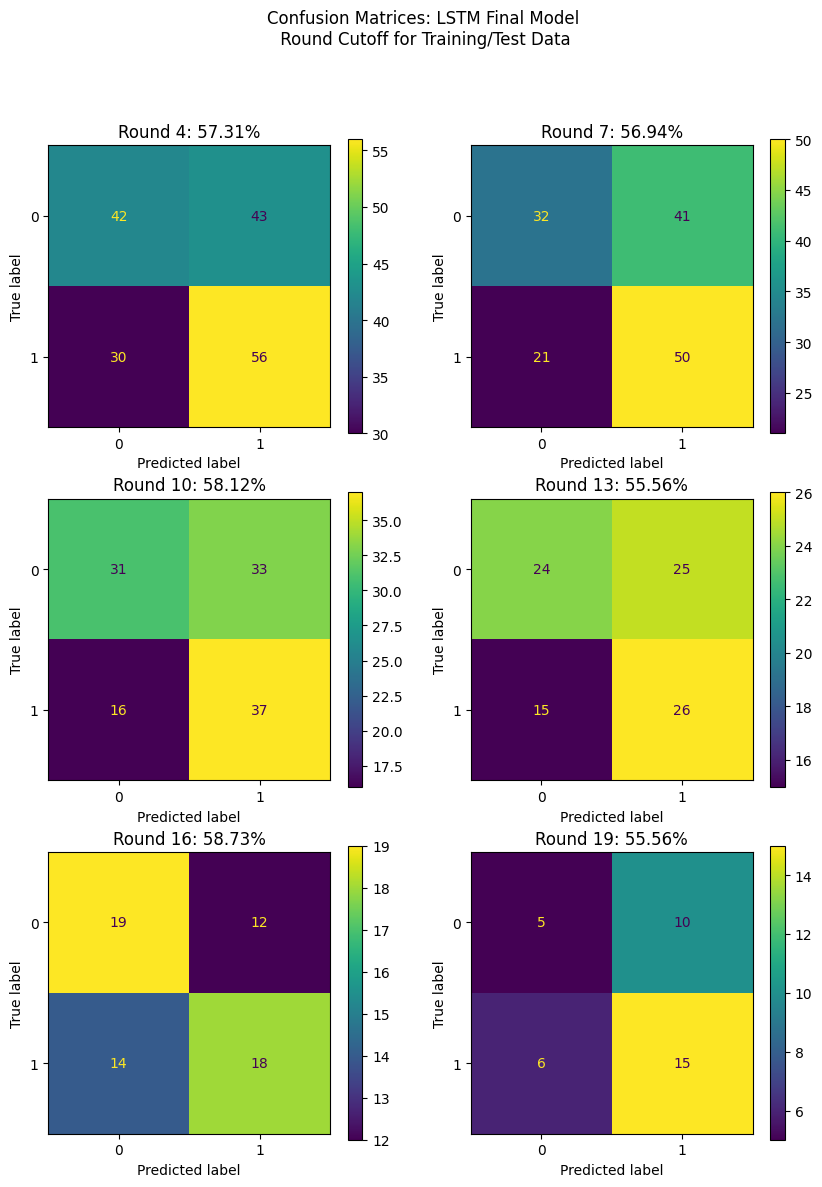

In [367]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(10)
fig.set_figheight(13)
fig.suptitle("Confusion Matrices: LSTM Final Model\n Round Cutoff for Training/Test Data")
cf_final_r4.plot(ax=ax[0][0]), cf_final_r7.plot(ax=ax[0][1])
cf_final_r10.plot(ax=ax[1][0]), cf_final_r13.plot(ax=ax[1][1])
cf_final_r16.plot(ax=ax[2][0]), cf_final_r19.plot(ax=ax[2][1])

ax[0][0].set_title(f'Round 4: {"{:.2f}".format(results_final_r4[1]*100)}%'), ax[0][1].set_title(f'Round 7: {"{:.2f}".format(results_final_r7[1]*100)}%')
ax[1][0].set_title(f'Round 10: {"{:.2f}".format(results_final_r10[1]*100)}%'), ax[1][1].set_title(f'Round 13: {"{:.2f}".format(results_final_r13[1]*100)}%')
ax[2][0].set_title(f'Round 16: {"{:.2f}".format(results_final_r16[1]*100)}%'), ax[2][1].set_title(f'Round 19: {"{:.2f}".format(results_final_r19[1]*100)}%')

In [306]:
def train_model_exp( xTrain, yTrain, xValid , yValid):
    random.seed(26)
    model = Sequential()
    model.add(LSTM( 32 ,input_shape = (10,75), activation = 'tanh' , dropout = 0.3, recurrent_dropout = 0.3))
    model.add(Dense(2, activation="tanh"))
    model.build()   
    model.summary()
    model.compile( optimizer = "adam" , loss = 'mean_squared_error' , metrics = ['accuracy', 'mse'])

    reduce_lr = ReduceLROnPlateau( monitor = 'accuracy', factor = 0.01, patience=10, cooldown=0)
    
    callbacks = [ reduce_lr ]
    train_history = model.fit( xTrain, yTrain , epochs = 50, shuffle=False, callbacks=callbacks, verbose = 2, validation_split = 0.1)
    
    score = model.evaluate( xValid , yValid )
    pred = model.predict(xValid)
    
    print( "Accuracy: {:0.4}".format( score[1] ))
    print( "Loss:", score[0] )
    return score, pred, train_history


Model: "sequential_259"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_259 (LSTM)             (None, 32)                13824     
                                                                 
 dense_259 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 4s - loss: 0.4779 - accuracy: 0.6250 - mse: 0.4779 - val_loss: 0.4166 - val_accuracy: 0.6667 - val_mse: 0.4166 - lr: 0.0010 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.4407 - accuracy: 0.6250 - mse: 0.4407 - val_loss: 0.3677 - val_accuracy: 0.6667 - val_mse: 0.3677 - lr: 0.0010 - 51ms/epoch - 51ms/step
Epoch 3/50
1/1 - 0s - loss: 0.3732 - accuracy: 0.6250 - mse: 0.3732 - val_loss: 0.3262 - val_accuracy: 0.6667 - val_

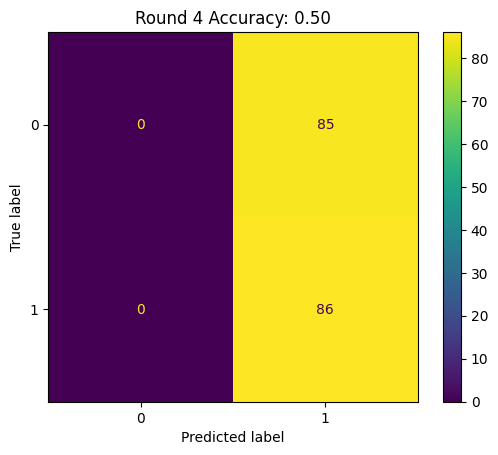

In [327]:
x_train_2021_r4 = x_train_2021[:27]
y_train_2021_r4 = y_train_2021_OHE[:27]

x_test_2021_r4 = np.concatenate((x_train_2021[27:], x_valid_2021))
y_test_2021_r4 = np.concatenate((y_train_2021_OHE[27:], y_valid_2021_OHE))

results_2021_r4, pred_2021_r4, history_2021_r4 = train_model_exp(x_train_2021_r4, y_train_2021_r4, x_test_2021_r4, y_test_2021_r4)

cf_2021_r4 = build_conf_matrix(pred_2021_r4, y_true_2021[36:])
cf_2021_r4.plot()
plt.title(f'Round 4 Accuracy: {"{:.2f}".format(results_2021_r4[1])}')
plt.show()

Model: "sequential_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_261 (LSTM)             (None, 32)                13824     
                                                                 
 dense_261 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 - 4s - loss: 0.5030 - accuracy: 0.5833 - mse: 0.5030 - val_loss: 0.3621 - val_accuracy: 0.6667 - val_mse: 0.3621 - lr: 0.0010 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.3761 - accuracy: 0.5833 - mse: 0.3761 - val_loss: 0.2874 - val_accuracy: 0.6667 - val_mse: 0.2874 - lr: 0.0010 - 54ms/epoch - 27ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3308 - accuracy: 0.4792 - mse: 0.3308 - val_loss: 0.2473 - val_accuracy: 0.6667 - val_

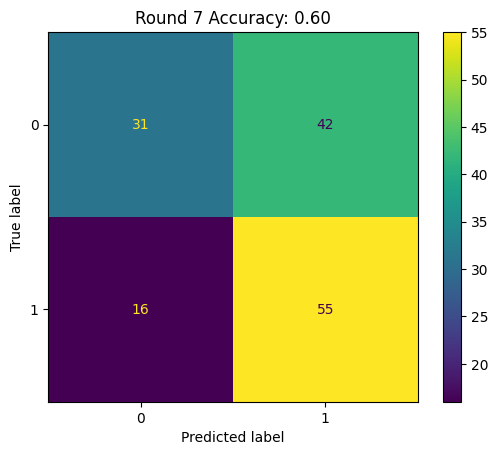

In [329]:
x_train_2021_r7 = x_train_2021[:54]
y_train_2021_r7 = y_train_2021_OHE[:54]

x_test_2021_r7 = np.concatenate((x_train_2021[54:], x_valid_2021))
y_test_2021_r7 = np.concatenate((y_train_2021_OHE[54:], y_valid_2021_OHE))

results_2021_r7, pred_2021_r7, history_2021_r7 = train_model_exp(x_train_2021_r7, y_train_2021_r7, x_test_2021_r7, y_test_2021_r7)

cf_2021_r7 = build_conf_matrix(pred_2021_r7, y_true_2021[63:])
cf_2021_r7.plot()
plt.title(f'Round 7 Accuracy: {"{:.2f}".format(results_2021_r7[1])}')
plt.show()

Model: "sequential_264"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_264 (LSTM)             (None, 32)                13824     
                                                                 
 dense_264 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3/3 - 4s - loss: 0.4947 - accuracy: 0.5972 - mse: 0.4947 - val_loss: 0.2527 - val_accuracy: 0.8889 - val_mse: 0.2527 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3410 - accuracy: 0.5972 - mse: 0.3410 - val_loss: 0.1794 - val_accuracy: 0.8889 - val_mse: 0.1794 - lr: 0.0010 - 60ms/epoch - 20ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2731 - accuracy: 0.6250 - mse: 0.2731 - val_loss: 0.1770 - val_accuracy: 0.8889 - val_

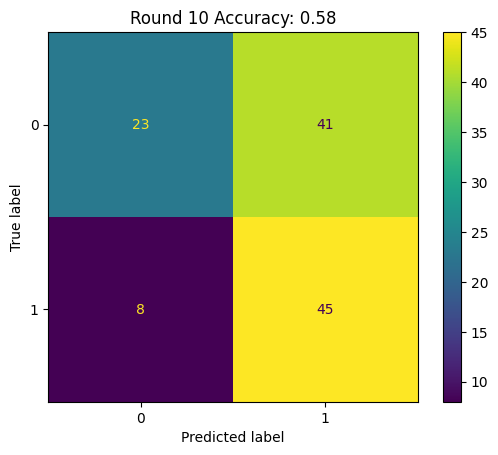

In [332]:
x_train_2021_r10 = x_train_2021[:81]
y_train_2021_r10 = y_train_2021_OHE[:81]

x_test_2021_r10 = np.concatenate((x_train_2021[81:], x_valid_2021))
y_test_2021_r10 = np.concatenate((y_train_2021_OHE[81:], y_valid_2021_OHE))

results_2021_r10, pred_2021_r10, history_2021_r10 = train_model_exp(x_train_2021_r10, y_train_2021_r10, x_test_2021_r10, y_test_2021_r10)

cf_2021_r10 = build_conf_matrix(pred_2021_r10, y_true_2021[90:])
cf_2021_r10.plot()
plt.title(f'Round 10 Accuracy: {"{:.2f}".format(results_2021_r10[1])}')
plt.show()

Model: "sequential_268"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_268 (LSTM)             (None, 32)                13824     
                                                                 
 dense_268 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4492 - accuracy: 0.5876 - mse: 0.4492 - val_loss: 0.3669 - val_accuracy: 0.3636 - val_mse: 0.3669 - lr: 0.0010 - 4s/epoch - 951ms/step
Epoch 2/50
4/4 - 0s - loss: 0.3188 - accuracy: 0.5670 - mse: 0.3188 - val_loss: 0.2655 - val_accuracy: 0.5455 - val_mse: 0.2655 - lr: 0.0010 - 66ms/epoch - 17ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2512 - accuracy: 0.5979 - mse: 0.2512 - val_loss: 0.2517 - val_accuracy: 0.4545 - v

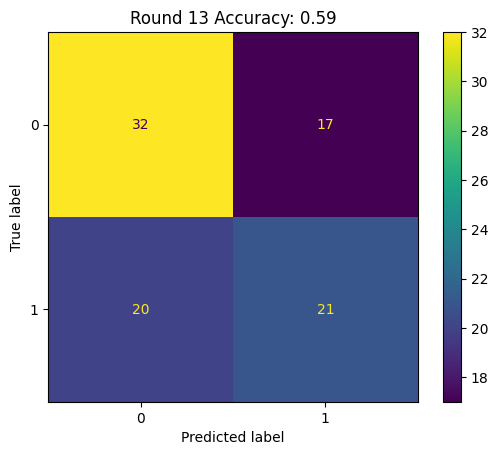

In [336]:
x_train_2021_r13 = x_train_2021[:108]
y_train_2021_r13 = y_train_2021_OHE[:108]

x_test_2021_r13 = np.concatenate((x_train_2021[108:], x_valid_2021))
y_test_2021_r13 = np.concatenate((y_train_2021_OHE[108:], y_valid_2021_OHE))

results_2021_r13, pred_2021_r13, history_2021_r13 = train_model_exp(x_train_2021_r13, y_train_2021_r13, x_test_2021_r13, y_test_2021_r13)

cf_2021_r13 = build_conf_matrix(pred_2021_r13, y_true_2021[117:])
cf_2021_r13.plot()
plt.title(f'Round 13 Accuracy: {"{:.2f}".format(results_2021_r13[1])}')
plt.show()

Model: "sequential_267"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_267 (LSTM)             (None, 32)                13824     
                                                                 
 dense_267 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
4/4 - 4s - loss: 0.4580 - accuracy: 0.5620 - mse: 0.4580 - val_loss: 0.4085 - val_accuracy: 0.2143 - val_mse: 0.4085 - lr: 0.0010 - 4s/epoch - 1s/step
Epoch 2/50
4/4 - 0s - loss: 0.2967 - accuracy: 0.5868 - mse: 0.2967 - val_loss: 0.2757 - val_accuracy: 0.2143 - val_mse: 0.2757 - lr: 0.0010 - 81ms/epoch - 20ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2656 - accuracy: 0.5455 - mse: 0.2656 - val_loss: 0.2586 - val_accuracy: 0.5714 - val_

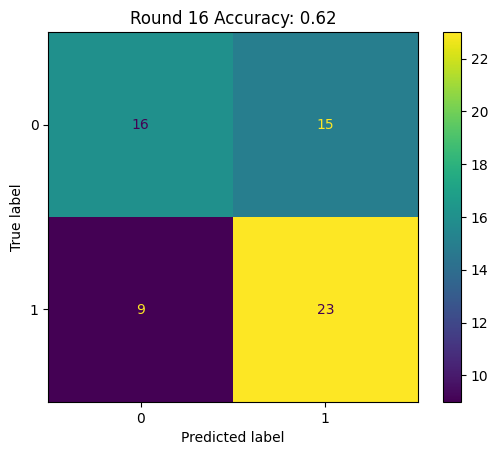

In [335]:
x_train_2021_r16 = x_train_2021[:135]
y_train_2021_r16 = y_train_2021_OHE[:135]

x_test_2021_r16 = np.concatenate((x_train_2021[135:], x_valid_2021))
y_test_2021_r16 = np.concatenate((y_train_2021_OHE[135:], y_valid_2021_OHE))

results_2021_r16, pred_2021_r16, history_2021_r16 = train_model_exp(x_train_2021_r16, y_train_2021_r16, x_test_2021_r16, y_test_2021_r16)

cf_2021_r16 = build_conf_matrix(pred_2021_r16, y_true_2021[144:])
cf_2021_r16.plot()
plt.title(f'Round 16 Accuracy: {"{:.2f}".format(results_2021_r16[1])}')
plt.show()

Model: "sequential_278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_278 (LSTM)             (None, 32)                13824     
                                                                 
 dense_278 (Dense)           (None, 2)                 66        
                                                                 
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 - 4s - loss: 0.4458 - accuracy: 0.5034 - mse: 0.4458 - val_loss: 0.2909 - val_accuracy: 0.5294 - val_mse: 0.2909 - lr: 0.0010 - 4s/epoch - 786ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2762 - accuracy: 0.5310 - mse: 0.2762 - val_loss: 0.2603 - val_accuracy: 0.4706 - val_mse: 0.2603 - lr: 0.0010 - 83ms/epoch - 17ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2573 - accuracy: 0.5310 - mse: 0.2573 - val_loss: 0.2866 - val_accuracy: 0.4706 - v

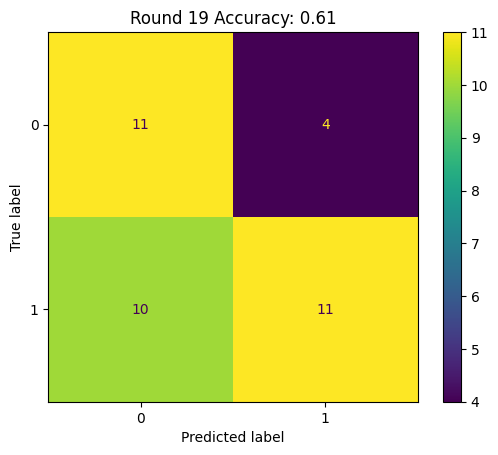

In [347]:
results_2021_r19, pred_2021_r19, history_2021_r19 = train_model_exp(x_train_2021, y_train_2021_OHE, x_valid_2021, y_valid_2021_OHE)

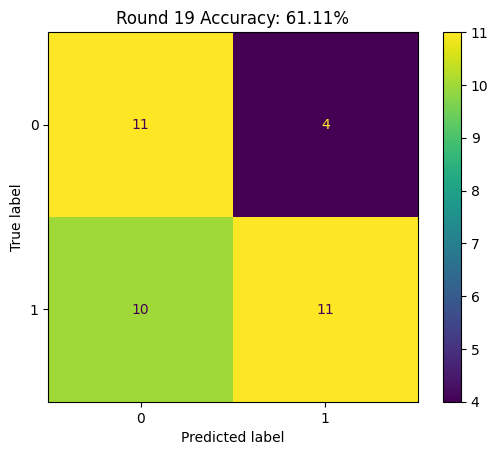

In [366]:
cf_2021_r19 = build_conf_matrix(pred_2021_r19, y_true_2021[171:])
cf_2021_r19.plot()
plt.title(f'Round 19 Accuracy: {"{:.2f}".format(results_2021_r19[1]*100)}%')
plt.show()

(Text(0.5, 1.0, 'Round 16: 61.90%'), Text(0.5, 1.0, 'Round 19: 61.11%'))

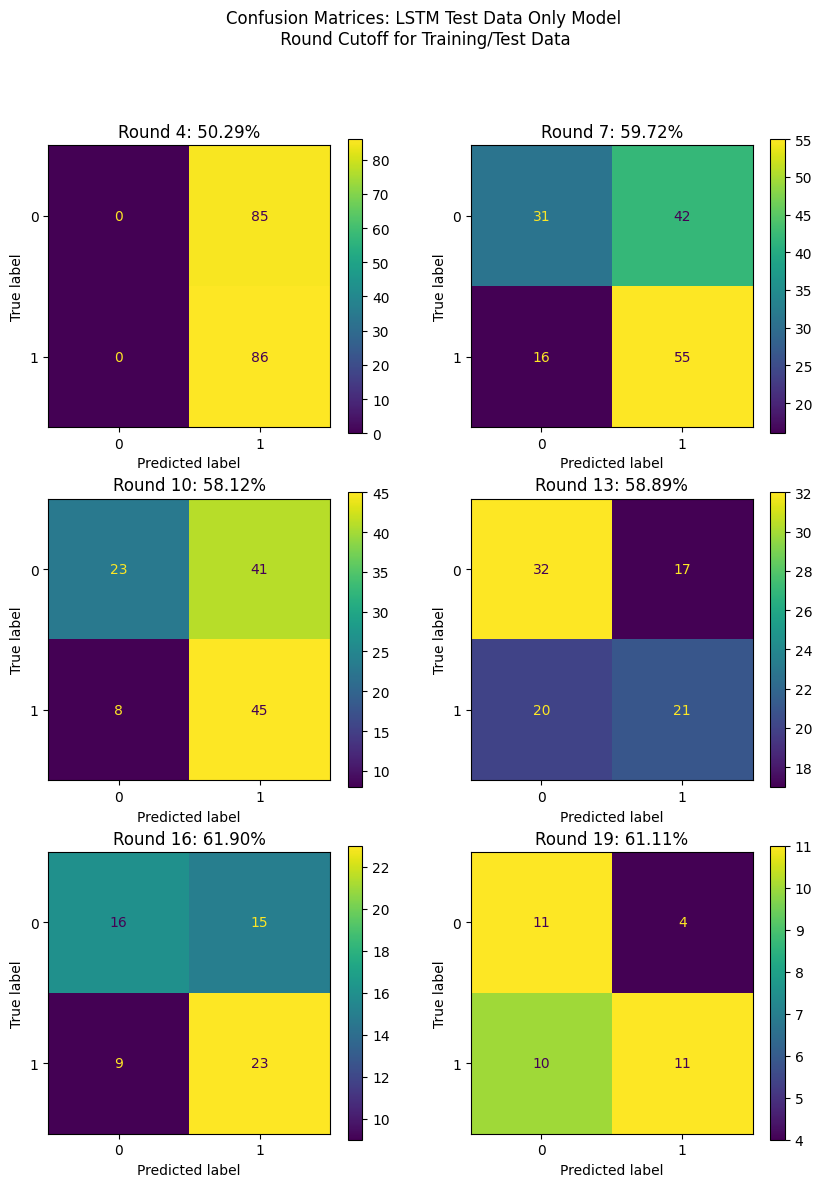

In [365]:
fig, ax = plt.subplots(3,2)
fig.set_figwidth(10)
fig.set_figheight(13)
fig.suptitle("Confusion Matrices: LSTM Test Data Only Model\n Round Cutoff for Training/Test Data")
cf_2021_r4.plot(ax=ax[0][0]), cf_2021_r7.plot(ax=ax[0][1])
cf_2021_r10.plot(ax=ax[1][0]), cf_2021_r13.plot(ax=ax[1][1])
cf_2021_r16.plot(ax=ax[2][0]), cf_2021_r19.plot(ax=ax[2][1])

ax[0][0].set_title(f'Round 4: {"{:.2f}".format(results_2021_r4[1]*100)}%'), ax[0][1].set_title(f'Round 7: {"{:.2f}".format(results_2021_r7[1]*100)}%')
ax[1][0].set_title(f'Round 10: {"{:.2f}".format(results_2021_r10[1]*100)}%'), ax[1][1].set_title(f'Round 13: {"{:.2f}".format(results_2021_r13[1]*100)}%')
ax[2][0].set_title(f'Round 16: {"{:.2f}".format(results_2021_r16[1]*100)}%'), ax[2][1].set_title(f'Round 19: {"{:.2f}".format(results_2021_r19[1]*100)}%')

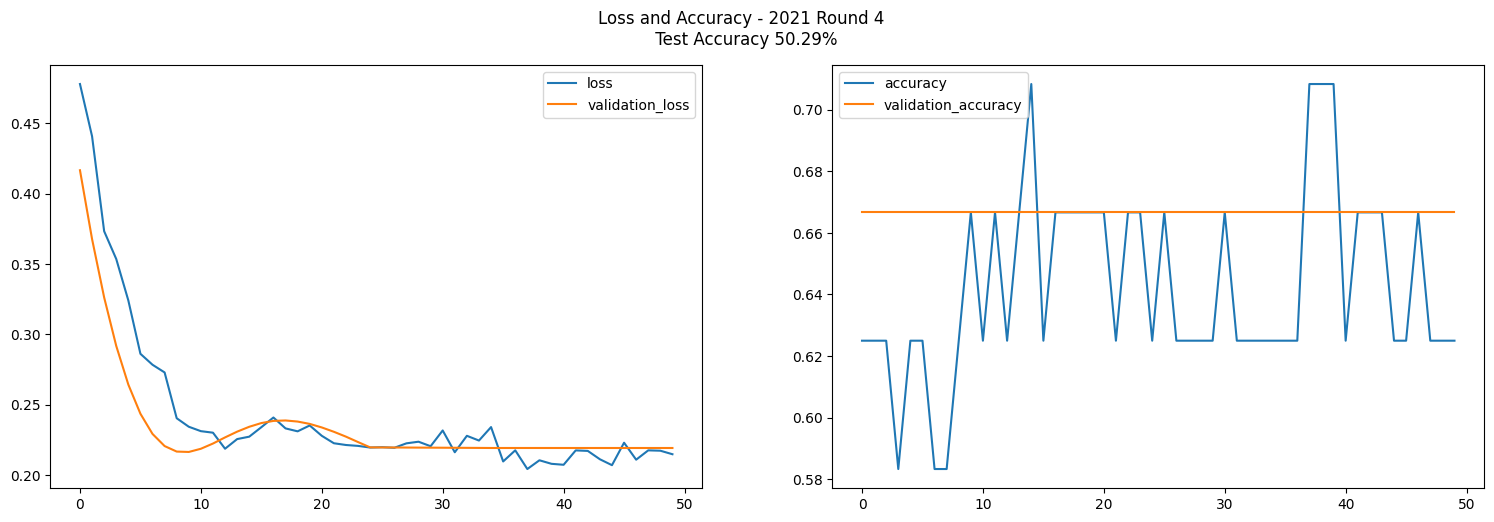

In [368]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 4 \n Test Accuracy {"{:.2f}".format(results_2021_r4[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r4.history['loss'])
plt.plot(history_2021_r4.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r4.history['accuracy'])
plt.plot(history_2021_r4.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

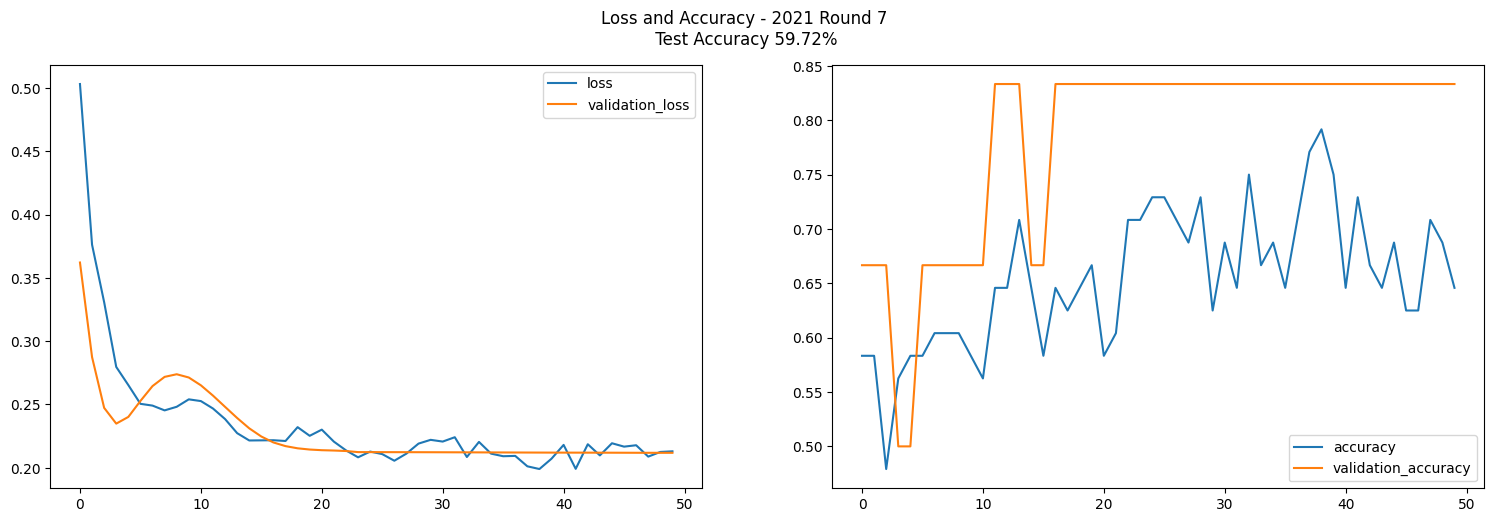

In [369]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 7\n Test Accuracy {"{:.2f}".format(results_2021_r7[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r7.history['loss'])
plt.plot(history_2021_r7.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r7.history['accuracy'])
plt.plot(history_2021_r7.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

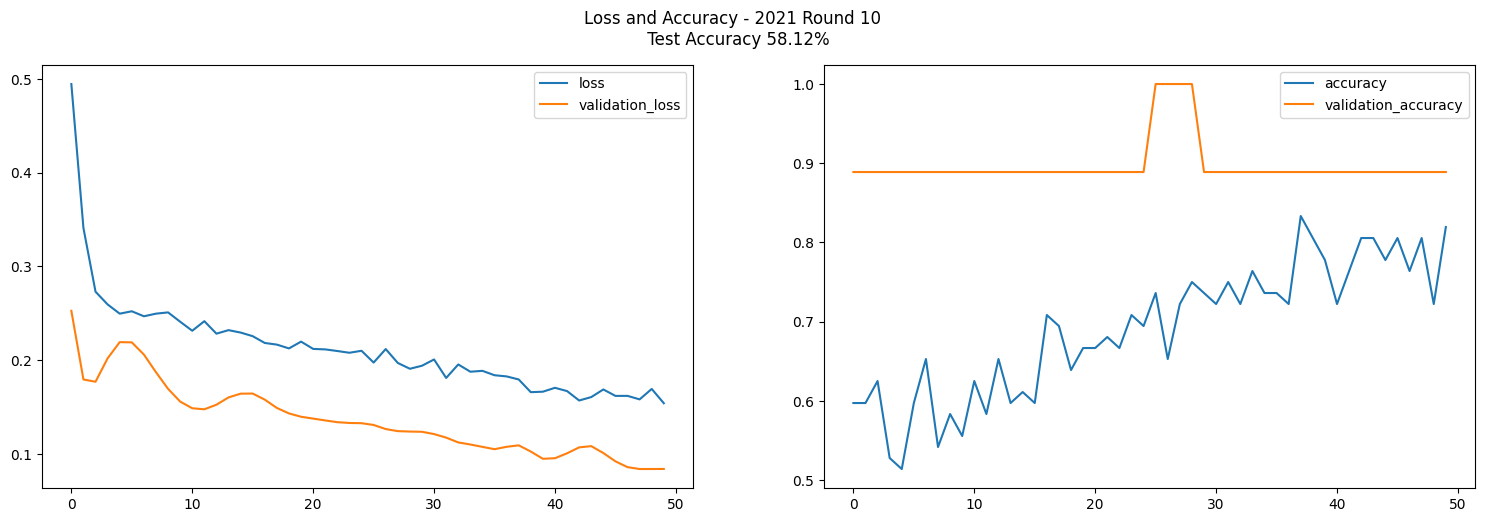

In [370]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 10 \n Test Accuracy {"{:.2f}".format(results_2021_r10[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r10.history['loss'])
plt.plot(history_2021_r10.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r10.history['accuracy'])
plt.plot(history_2021_r10.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

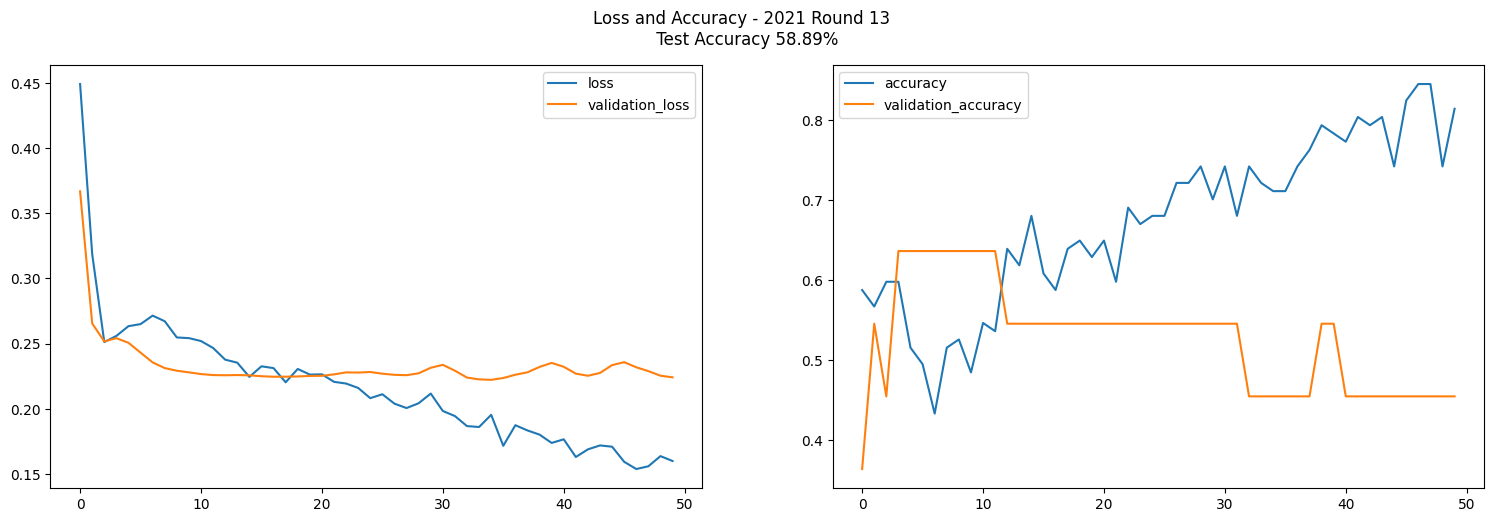

In [371]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 13 \n Test Accuracy {"{:.2f}".format(results_2021_r13[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r13.history['loss'])
plt.plot(history_2021_r13.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r13.history['accuracy'])
plt.plot(history_2021_r13.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

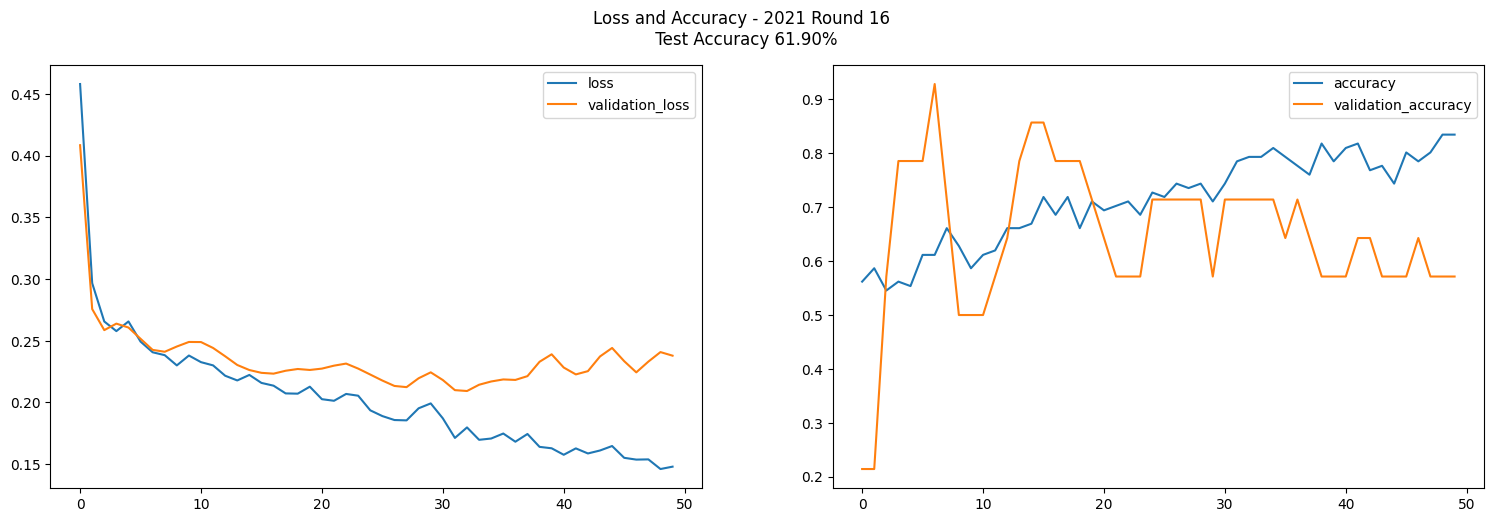

In [372]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 16 \n Test Accuracy {"{:.2f}".format(results_2021_r16[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r16.history['loss'])
plt.plot(history_2021_r16.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r16.history['accuracy'])
plt.plot(history_2021_r16.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()

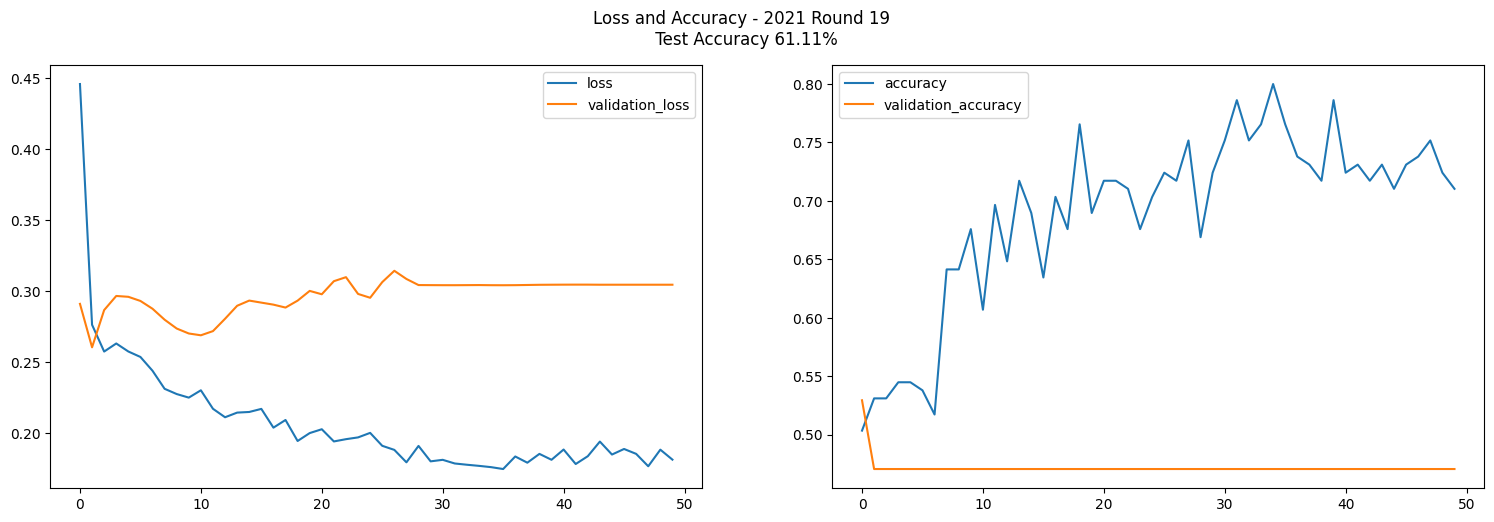

In [373]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
fig.suptitle(f'Loss and Accuracy - 2021 Round 19 \n Test Accuracy {"{:.2f}".format(results_2021_r19[1]*100)}%')
plt.subplot(1,2,1)
plt.plot(history_2021_r19.history['loss'])
plt.plot(history_2021_r19.history['val_loss'])
plt.legend(['loss', 'validation_loss'])
plt.subplot(1,2,2)
plt.plot(history_2021_r19.history['accuracy'])
plt.plot(history_2021_r19.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'])
plt.show()